In [1]:
import pandas as pd 
import numpy as np 
 
import matplotlib.pyplot as plt 




import os

In [8]:
print(os.getcwd())


#Obtain Basic Statistics for Textual Lengths
# Import the CSV file
file_path = '../data/raw_analyst_ratings.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()



c:\Users\HP\Desktop\10 Acadamy\AIM Week 1\AIM-Week-1\AIM-WEEK-1\notebooks


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:

# Calculate headline lengths
data['headline_length'] = data['headline'].apply(len)

# Descriptive statistics for headline lengths
headline_stats = data['headline_length'].describe()
print("Headline Length Statistics:\n", headline_stats)

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [5]:
# Count articles per publisher
publisher_counts = data['publisher'].value_counts()
print("Number of Articles Per Publisher:\n", publisher_counts)


Number of Articles Per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [6]:
# Example data with timezone offset
data = pd.DataFrame({'date': ['2020-06-05 10:30:54-04:00', '2020-06-06 15:45:00-04:00']})

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract date parts for analysis
data['day'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month_name()

# Count articles by day of the week
day_counts = data['day'].value_counts()
print("Articles Per Day of the Week:\n", day_counts)

# Count articles by month
month_counts = data['month'].value_counts()
print("Articles Per Month:\n", month_counts)

Articles Per Day of the Week:
 day
Friday      1
Saturday    1
Name: count, dtype: int64
Articles Per Month:
 month
June    2
Name: count, dtype: int64


In [10]:
print(data)

         Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.

In [11]:

from textblob import TextBlob

# Calculate sentiment polarity
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

print(data)


         Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.

In [12]:
data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,0.00
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38,0.15
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52,0.15
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56,0.00
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54,0.00


In [13]:
data.to_csv("../data/sentiment_score.csv")


In [ ]:
data['sentiment_category'] = pd.cut(
    data['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive']
)
print("Sentiment Analysis:\n", data['sentiment_category'].value_counts())

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract keywords
vectorizer = CountVectorizer(max_features=20, stop_words='english')
keywords_matrix = vectorizer.fit_transform(data['headline'])
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:\n", keywords)


Top Keywords:
 ['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']


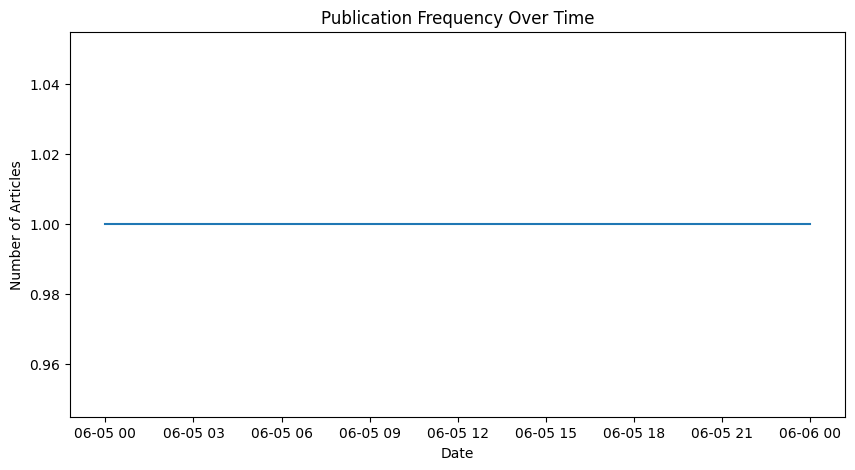

In [9]:
import matplotlib.pyplot as plt

# Group by date
daily_counts = data.groupby(data['date'].dt.date).size()

# Plot the data
plt.figure(figsize=(10, 5))
daily_counts.plot(kind='line')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


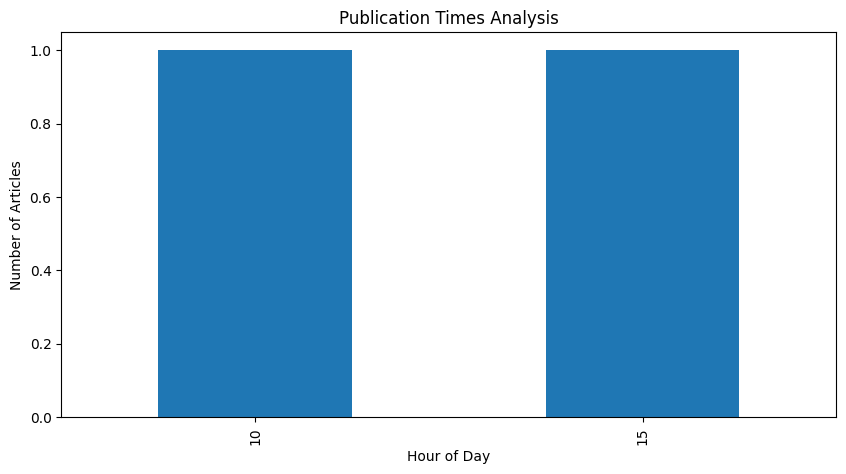

In [16]:

#Analyze publishing times for pattern

data['hour'] = data['date'].dt.hour
hourly_counts = data['hour'].value_counts().sort_index()

# Plot hourly counts
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar')
plt.title('Publication Times Analysis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()


In [22]:
#Identify publishers contributing most:
print("Top Publishers:\n", data['publisher'].value_counts().head())


Top Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


In [23]:
#If emails are used as publisher names, extract domains:
# Extract domains from publisher emails
data['domain'] = data['publisher'].str.extract(r'@([\w.-]+)')
domain_counts = data['domain'].value_counts()
print("Top Email Domains:\n", domain_counts)


Top Email Domains:
 domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
